# Worksheet 06

Name: Victor Verma
UID: U86967149

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

- K means always chooses the initial centroids randomly. This could cause issues if two (or more) or the initial centroids are too close to each other and split up an optimal cluster.
- In K means ++, choose a random center, and let D(x) be the distance between x and the centers selected so far. Choose the next center with a probability proportional to D(x)^a. If a = 0, it is a random initialization. if a = infinity, then it follows the farthest-first traversal. If a = 2, it is the K means ++ algorithm. Since K means is a subset of K means ++, there is no reason to use K means over K means ++.

b) What are some limitations of K means ++?

- It is not good at handling clusters of different sizes.
- It is not good at handling clusters of different densities.
- It prefers blobular clusters, and is not good at detecting fancy shapes.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

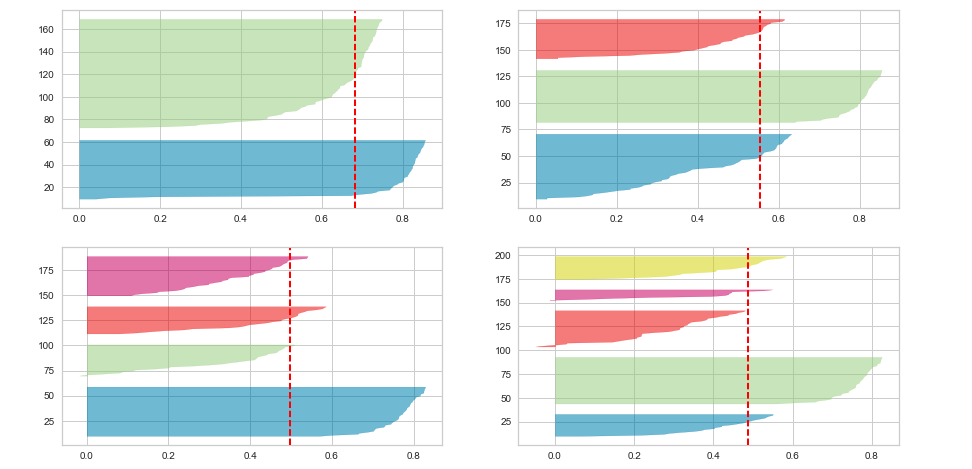

In [2]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose k = 2 clusters. You want the silhouette scores to be near or above the average, and close to 1. For k = 4 and k = 5, most of the silhouette scores are below the average, and both have clusters where all scores are below the average. Choosing k = 3 is also a solid choice, but the blue and red clusters have a sharp decline. In comparison, more values when k = 2 are at or above the average silhouette score, and the average score itself is also higher.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2 | 3 | 1 |√8 |
| B |√2 | 0 |√5 | 1 |√2 |
| C | 3 |√5 | 0 |√10|√5 |
| D | 1 | 1 |√10| 0 |√5 |
| E |√8 |√2 |√5 |√5 | 0 |

Step 2

|   |AD | B | C | E |
|---|---|---|---|---|
|AD | 0 | 1 | 3 |√5 |
| B | 1 | 0 |√5 |√2 |
| C | 3 |√5 | 0 |√5 |
| E |√5 |√2 |√5 | 0 |

Step 3

|   |ADB| C | E |
|---|---|---|---|
|ADB| 0 |√5 |√2 |
| C |√5 | 0 |√5 |
| E |√2 |√5 | 0 |

Step 4

|   |ADBE| C  |
|---|---|---|
|ADBE| 0 |√5 |
| C |√5 | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2 | 3 | 1 |√8 |
| B |√2 | 0 |√5 | 1 |√2 |
| C | 3 |√5 | 0 |√10|√5 |
| D | 1 | 1 |√10| 0 |√5 |
| E |√8 |√2 |√5 |√5 | 0 |

Step 2

|   |AB | C | D | E |
|---|---|---|---|---|
|AB | 0 | 3 | 1 |√8 |
| C | 3 | 0 |√10|√5 |
| D | 1 |√10| 0 |√5 |
| E |√8 |√5 |√5 | 0 |

Step 3

|   |ABD| C | E |
|---|---|---|---|
|ABD| 0 |√10|√8 |
| C |√10| 0 |√5 |
| E |√8 |√5 | 0 |

Step 4

|   |ABD|CE |
|---|---|---|
|ABD| 0 |√10|
|CE |√10| 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

In [2]:
sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

In [3]:
class DNA():
    def __init__(self, sequences):
        self.sequences = sequences
        self.sequence_indices = {i: seq for i, seq in enumerate(self.sequences)}
        self.distance_matrix = [[0 for seq1 in self.sequences] for seq2 in self.sequences]

    def __repr__(self):
        matrix = "\n"
        for row in self.distance_matrix:
            matrix += f"{row}\n"
        return matrix
    
    def calculate_distance_matrix(self):
        self.distance_matrix = [[hamming_distance(seq1, seq2) for seq1 in self.sequences] for seq2 in self.sequences]
        return self.distance_matrix

def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("sequences must have the same length")
    dist = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            dist += 1
    return dist

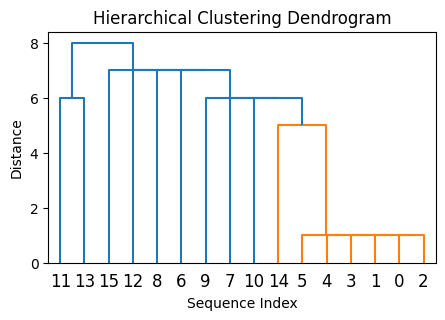

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

dna = DNA(sequences)
dna.calculate_distance_matrix()
clusters = linkage(squareform(dna.distance_matrix), "single")

plt.figure(figsize=(5, 3))
dendrogram(clusters)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sequence Index")
plt.ylabel("Distance")
plt.show()